In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape


(150, 5)

In [6]:
# Basic Data Exploration
print("\nBasic Information about Dataset:")
print(iris.info()) 


Basic Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
 # Summary Statistics
 print("\nSummary Statistics:")
 print(iris.describe())  


Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
 # Check for missing values
 print("\nMissing Values in Each Column:")
 print(iris.isnull().sum())  # Count of missing values


Missing Values in Each Column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
iris.duplicated().sum()

np.int64(1)

In [10]:
 np.int64(1)

np.int64(1)

Univariate Analysis


<Figure size 1200x800 with 0 Axes>

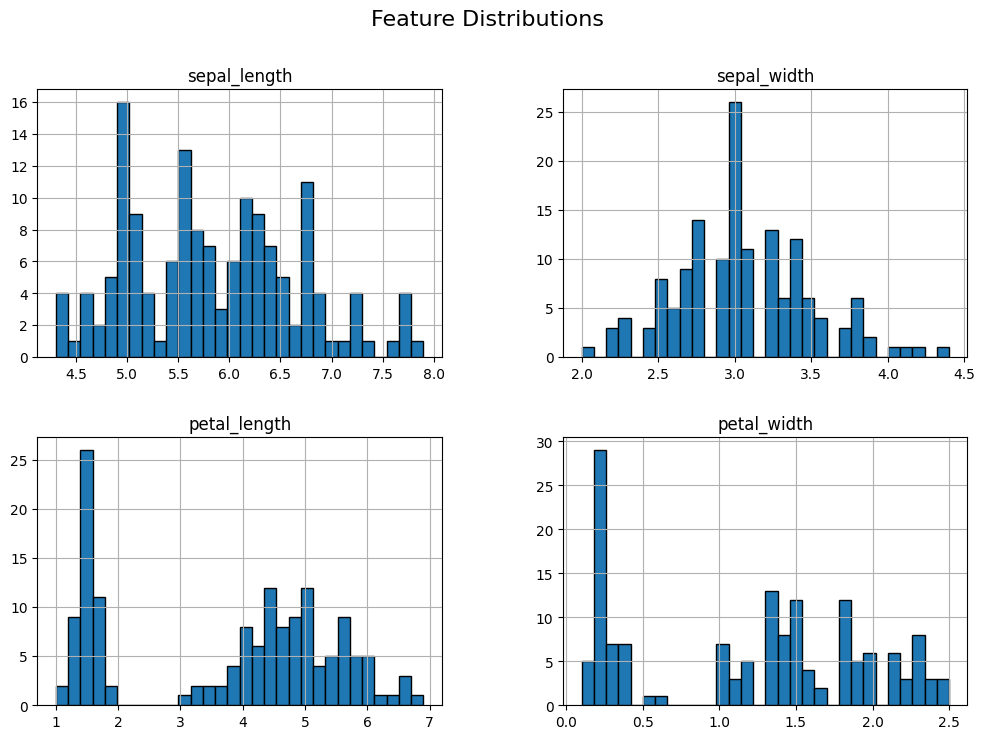

In [11]:
 # Histograms for distribution of features
 plt.figure(figsize=(12, 8))
 iris.hist(figsize=(12, 8), bins=30, edgecolor='black')
 plt.suptitle("Feature Distributions", fontsize=16)
 plt.show()

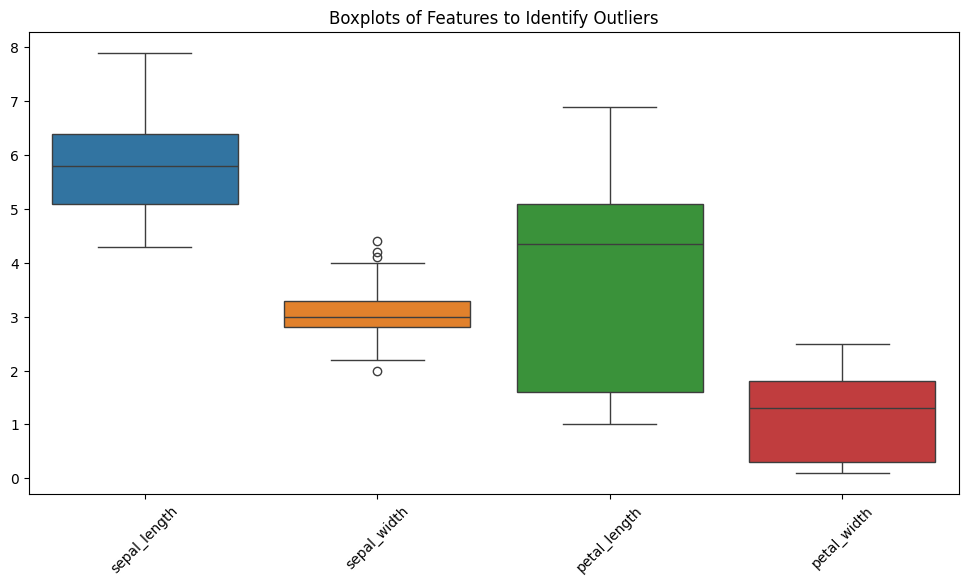

In [12]:
 # Boxplots for outlier detection
 plt.figure(figsize=(12, 6))
 sns.boxplot(data=iris)
 plt.xticks(rotation=45)
 plt.title("Boxplots of Features to Identify Outliers")
 plt.show()

##  Heatmap: Visualizing the Correlation Matrix

In [13]:
 num_col = iris.select_dtypes(include=[np.number]).columns
 cat_col = iris.select_dtypes(include=['object']).columns
 print(f"numerical_data {num_col}")
 print(f"categorical_data {cat_col}")

numerical_data Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
categorical_data Index(['species'], dtype='object')


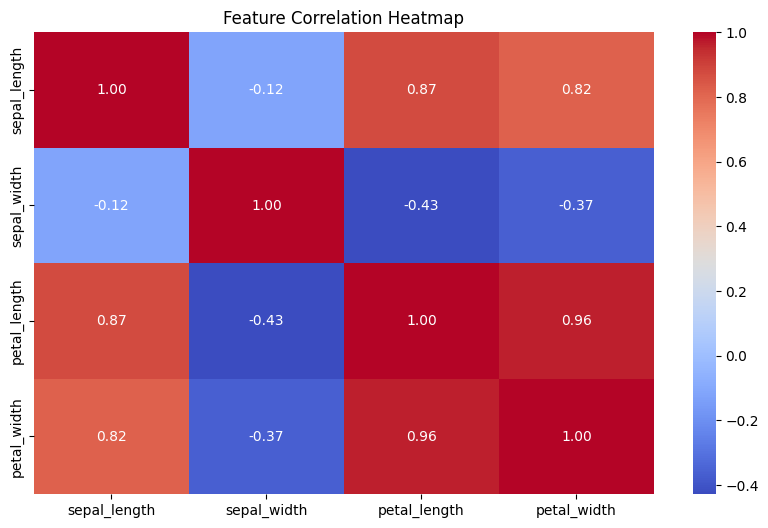

In [15]:
plt.figure(figsize=(10, 6))
corr_matrix = iris[num_col].corr('pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# Encode target labels
label_encoder = LabelEncoder()
iris["species"] = label_encoder.fit_transform(iris["species"])

In [19]:
# Define features and target
X = iris.drop(columns=["species"])
y = iris["species"]

In [23]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [27]:
# Make predictions
y_pred = nb_classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


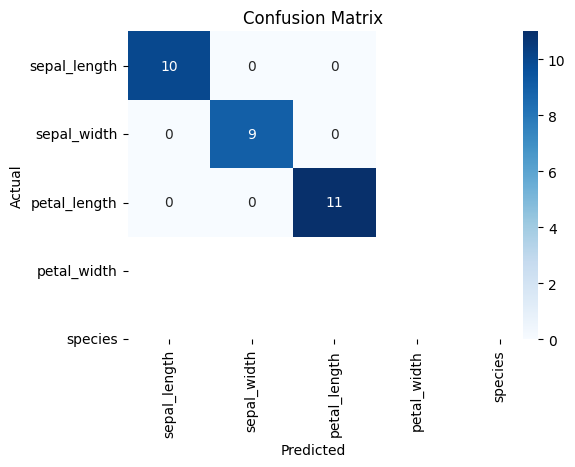

In [29]:
 # Visualize confusion matrix
 plt.figure(figsize=(6, 4))
 sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
 xticklabels=iris.keys(), yticklabels=iris.keys())
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.title('Confusion Matrix')
 plt.show()